In [149]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)


import seaborn as sns
import matplotlib.pyplot as plt



In [150]:
bike_data = pd.read_csv('day.csv')

In [151]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [152]:
bike_data.shape

(730, 16)

In [153]:
# There are a few number of features
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We notice that there are no null entries. That's a relief!

In [154]:
# Dropping useless columns for our analysis.
# Instant is just an ordering. 
# dteday won't be needed as we already have year and month for our analysis.
bike_data.drop(['instant', 'dteday'], axis=1, inplace=True)

Casual and registered columns need to be removed, as they are basically related to our target variable cnt.
`cnt = casual + registered`

With them in data we will end up ending high coefficients for them and analysis will be impacted. Let's remove them.

In [155]:
bike_data.drop(['casual', 'registered'], axis=1, inplace=True)

In [156]:
bike_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [157]:

print(bike_data.nunique())

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64


We can see that the temp, atemp, hum, windspeed and target variable are continuous in nature.

Since target variable is continous we can use linear regression here.

## EDA

Univariate analysis

In [158]:
def get_box_plot(data, ax, title='', xlabel='', ylabel='',figsize=(8, 6), color='cyan'):
    sns.boxplot(data, ax=ax, linewidth=1, color=color)
    

def get_distribution(data, ax, title='', xlabel='', ylabel='',figsize=(8, 6), color='cyan'):
    sns.histplot(data, ax=ax, color=color, kde=True)
    

def get_univariate_analysis_plots(data, title='', box_ylabel='', dist_ylabel='',figsize=(8, 6), box_color='cyan', dist_color='lightgreen'):
    fig, axs = plt.subplots(nrows=1, ncols = 2, figsize=(10,6))
    # sns.set_style('darkgrid')
    # sns.set_context('notebook')
    get_box_plot(data, axs[0], title='Box plot', ylabel=box_ylabel, figsize=figsize, color=box_color)
    axs[0].set_title('Box plot')
    axs[0].set_ylabel(box_ylabel)

    get_distribution(data, axs[1], title='Distribution', ylabel=dist_ylabel, figsize=figsize, color=dist_color)
    axs[1].set_title('Distribution')
    axs[1].set_ylabel(dist_ylabel)
    plt.subplots_adjust(wspace=0.3)
    fig.suptitle(title, fontsize=20, fontweight='bold')
    plt.show()


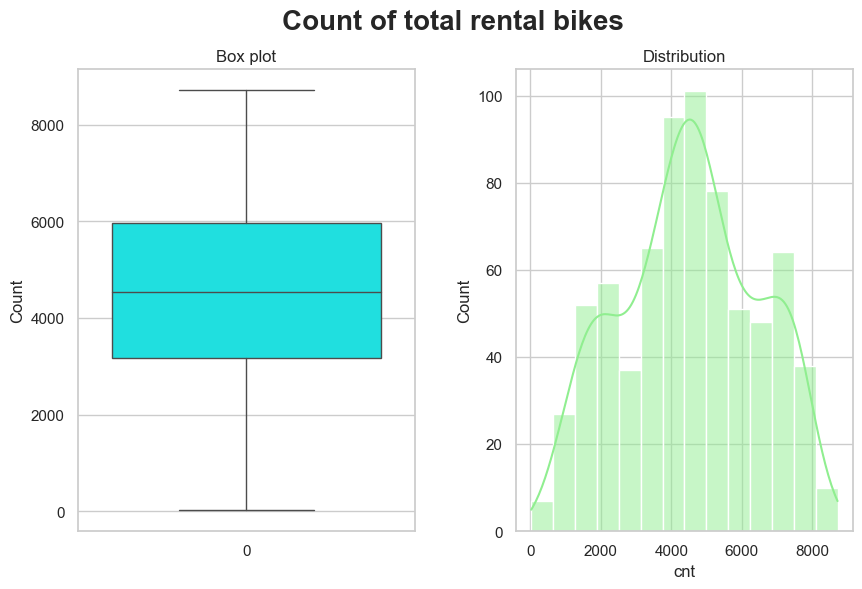

In [159]:
get_univariate_analysis_plots(bike_data['cnt'], title='Count of total rental bikes', dist_ylabel='Count', box_ylabel='Count', box_color='cyan', dist_color='lightgreen')

Count of rental bikes looks evenly distributed

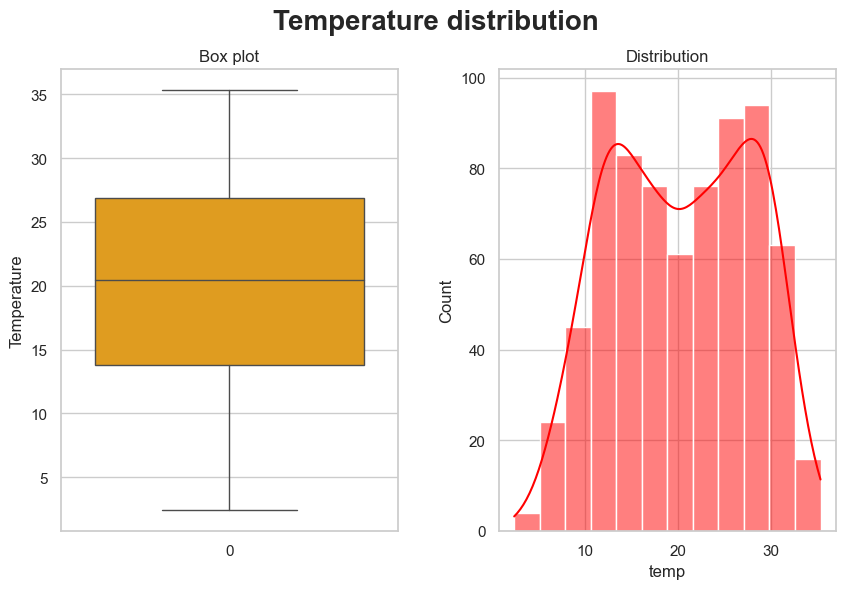

In [160]:
get_univariate_analysis_plots(bike_data['temp'], title='Temperature distribution', box_ylabel='Temperature', dist_ylabel='Count', box_color='orange', dist_color='red')

Temperature is generally between 11-30 degrees

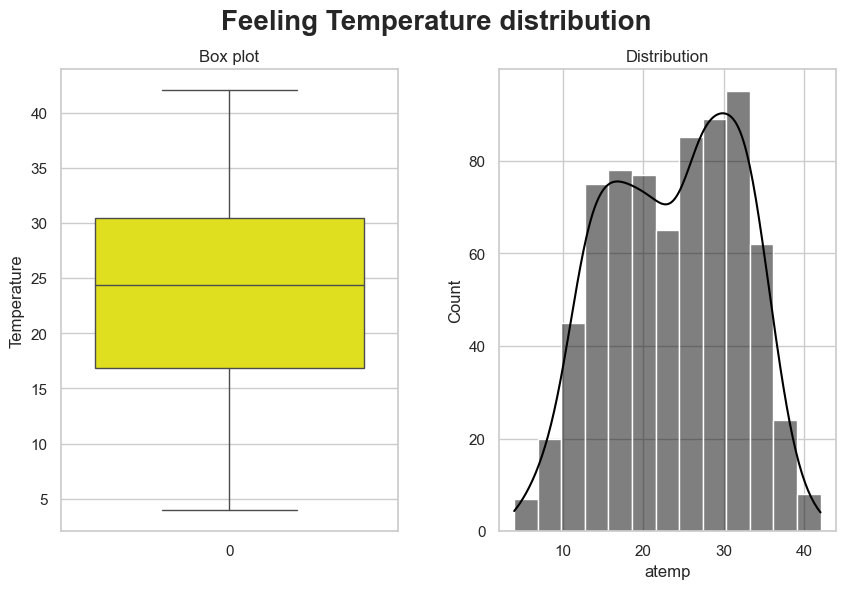

In [161]:
get_univariate_analysis_plots(bike_data['atemp'], title='Feeling Temperature distribution', box_ylabel='Temperature', dist_ylabel='Count', box_color='yellow', dist_color='black')

Distribution of feeling temperature and temperature looks similar.

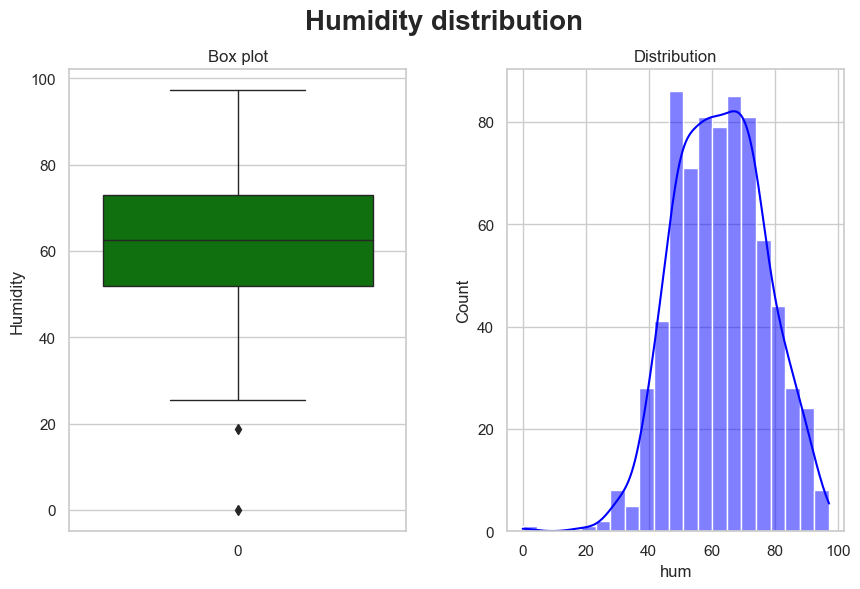

In [162]:
get_univariate_analysis_plots(bike_data['hum'], title='Humidity distribution', box_ylabel='Humidity', dist_ylabel='Count', box_color='green', dist_color='blue')

Humidity is evenly distributed and is mostly between 50 and 80

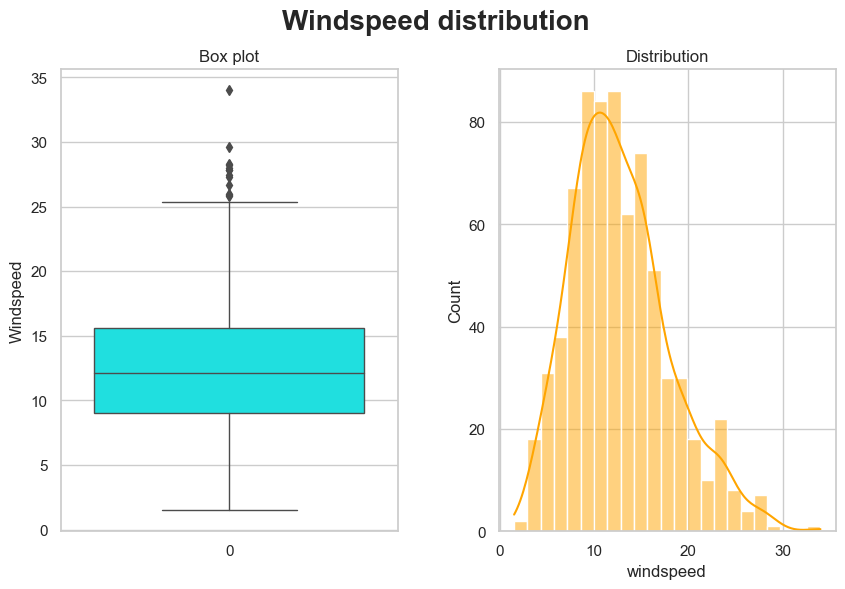

In [163]:
get_univariate_analysis_plots(bike_data['windspeed'], title='Windspeed distribution', box_ylabel='Windspeed', dist_ylabel='Count', box_color='cyan', dist_color='orange')

Windspeed is mostly between 10 and 16. There are some outliers but their value is realistic. Max windspeed is around 34

### Categorical univariate analysis

In [164]:
# For better understanding of weather situation let's modify the fields
def get_weather_situation(num):
    if num == 1:
        return 'Clear'
    elif num == 2:
        return 'Cloudy'
    elif num == 3:
        return 'Light Snow'
    else:
        return 'Heavy Rain'


bike_data['weathersit'] = bike_data['weathersit'].map(get_weather_situation)


In [165]:
# Let's perform similar exercise for the season

def get_season(num):
    if num == 1:
        return 'spring'
    elif num == 2:
        return 'summer'
    elif num == 3:
        return 'fall'
    else:
        return 'winter'


bike_data['season'] = bike_data['season'].map(get_season)

Let's check it for weather situation. Rest other fields won't provide much in analysis

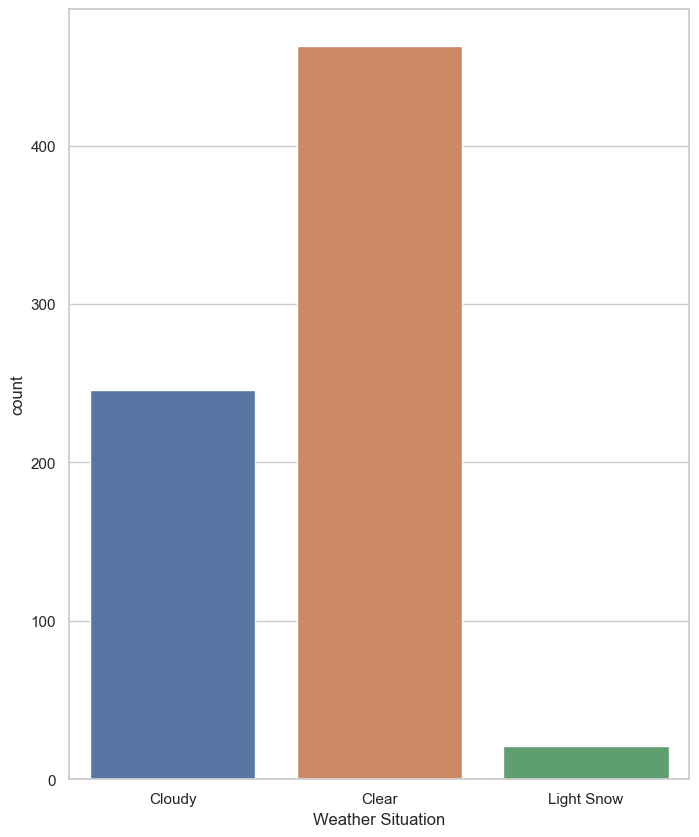

In [166]:
plt.figure(figsize=(8, 10))
sns.countplot(x=bike_data['weathersit'])
sns.set_theme(style="whitegrid")
plt.xlabel('Weather Situation')
plt.show()


We have data for mostly clear or cloudy weather. From data we know that, nobody rents a bike on a heavy rain day.

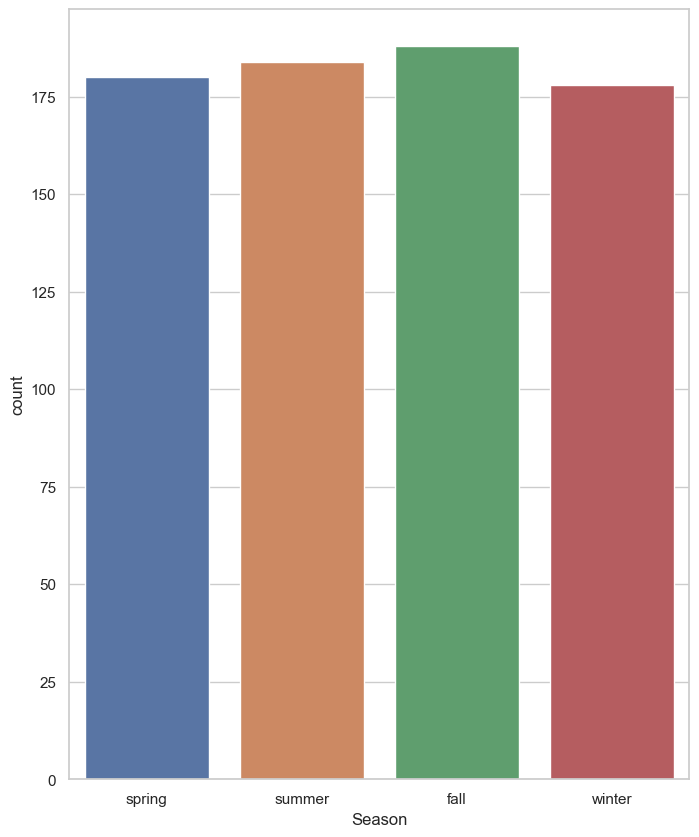

In [167]:
plt.figure(figsize=(8, 10))
sns.countplot(x=bike_data['season'])
sns.set_theme(style="whitegrid")
plt.xlabel('Season')
plt.show()


Season data is evenly distributed. We have data for all the seasons.

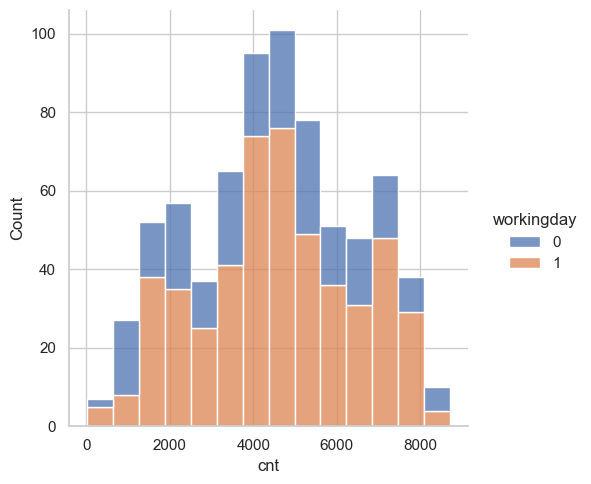

In [168]:
sns.displot(data=bike_data, x="cnt", hue="workingday", multiple="stack")
plt.show()

More people rent bike on a working day

### Segmented univariate analysis

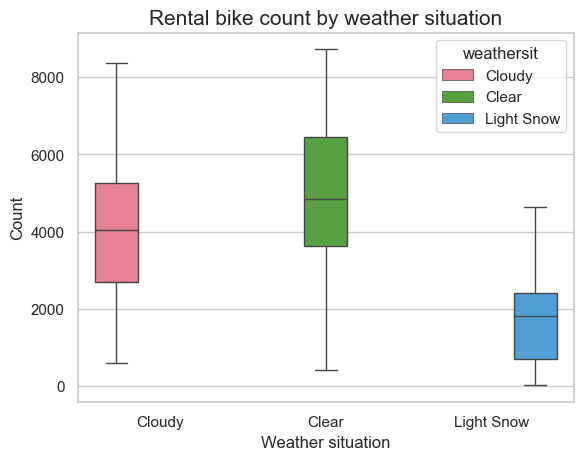

In [169]:
sns.boxplot(data=bike_data, x = 'weathersit', y=bike_data.cnt, color="lightblue", linewidth=1, palette="husl", hue ='weathersit')
plt.title("Rental bike count by weather situation", fontsize=15)
plt.ylabel('Count')
plt.xlabel('Weather situation')

plt.show()

More people rent in Clear and Cloudy weathers. Very few people rent in Snowy weather. Nobody rents in heavy rain. Bad weather is bad for business.

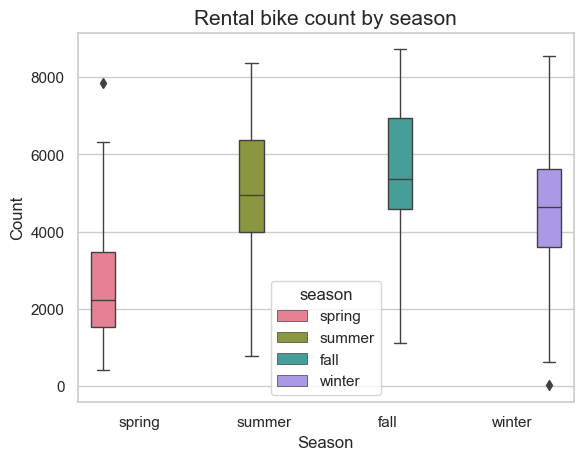

In [170]:
sns.boxplot(data=bike_data, x = 'season', y=bike_data.cnt, color="lightblue", linewidth=1, palette="husl", hue ='season')
plt.title("Rental bike count by season", fontsize=15)
plt.ylabel('Count')
plt.xlabel('Season')

plt.show()

More bikes are rented in summer and fall. Very few people rent in spring.

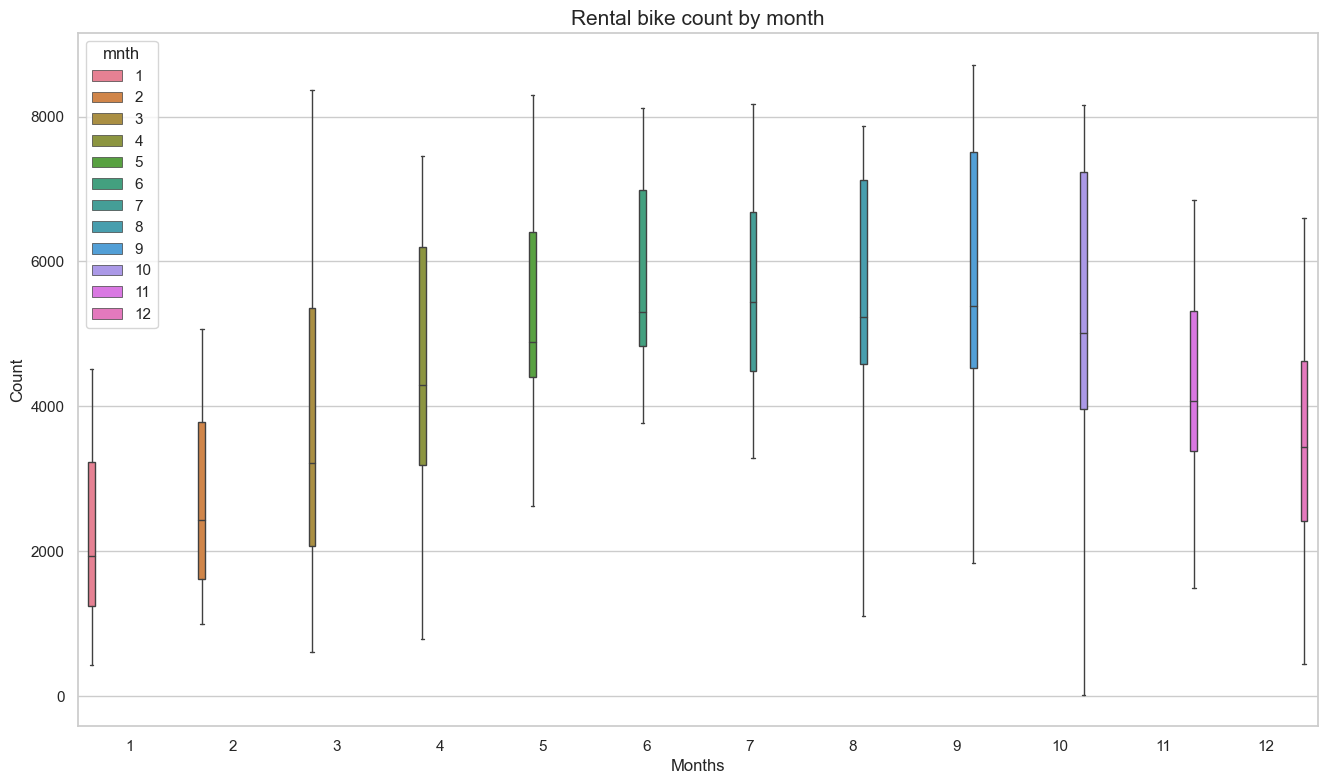

In [171]:
plt.figure(figsize=(16,9))
sns.boxplot(data=bike_data, x = 'mnth', y=bike_data.cnt, color="lightblue", linewidth=1, palette="husl", hue ='mnth')
plt.title("Rental bike count by month", fontsize=15)
plt.ylabel('Count')
plt.xlabel('Months')

plt.show()

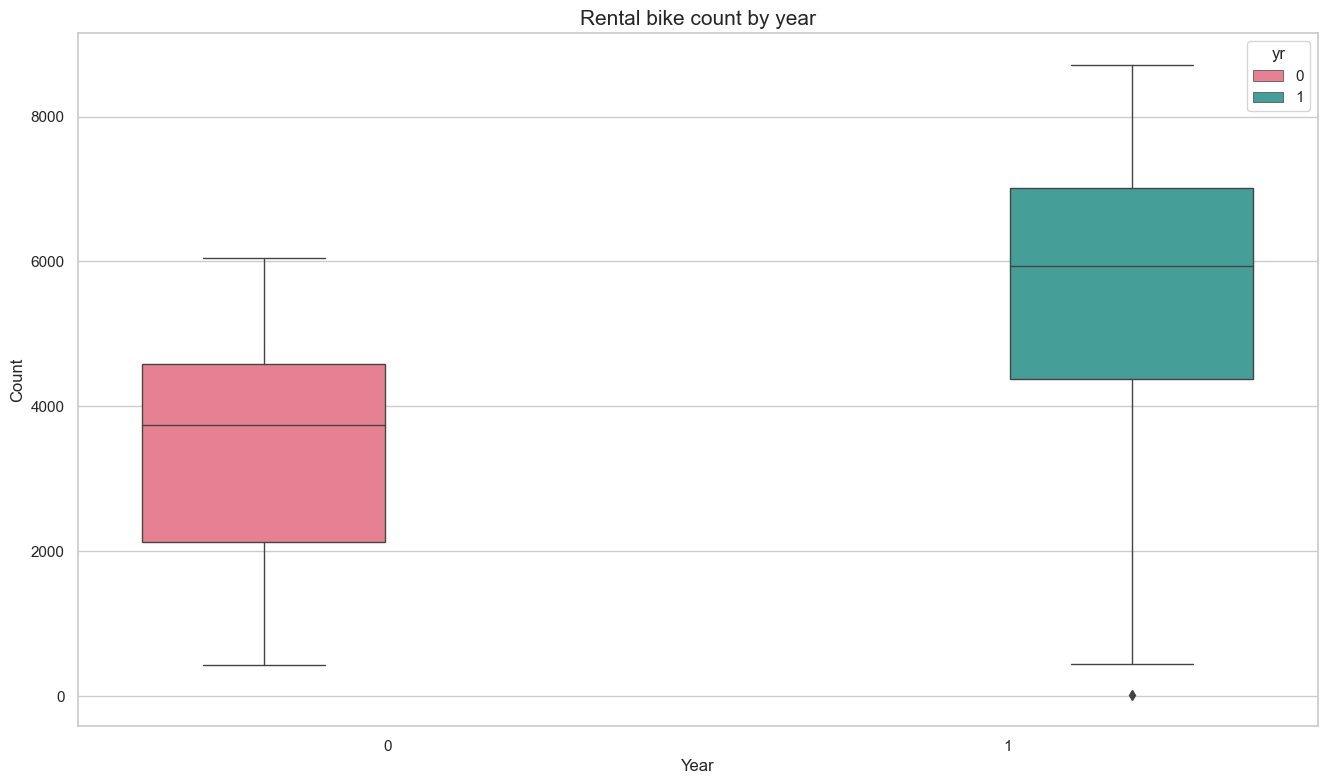

In [172]:
plt.figure(figsize=(16,9))
sns.boxplot(data=bike_data, x = 'yr', y=bike_data.cnt, color="lightblue", linewidth=1, palette="husl", hue ='yr')
plt.title("Rental bike count by year", fontsize=15)
plt.ylabel('Count')
plt.xlabel('Year')

plt.show()

We see a rise in rental bike by year.

Last and early months of a year are generally cold, so there are less number of bike rentals.

### Bivariate analysis

Let's see how count of bike rent changes with temperature, humidty and windspeed

In [173]:
def plot_scatter(data, x, y, title='', xlabel='', ylabel='', figsize=(8, 6), color='cyan'):
    sns.scatterplot(data=data, x=x, y=y, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

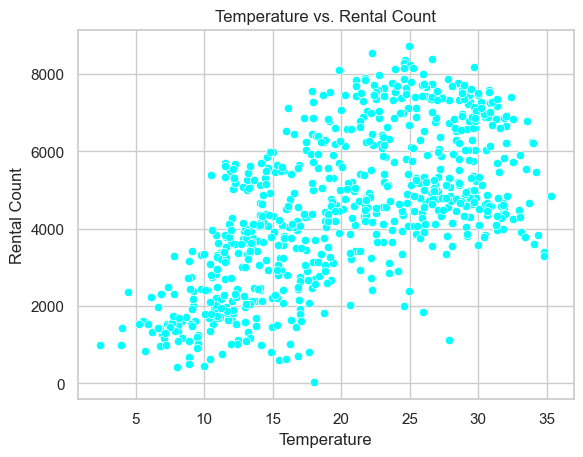

In [174]:
plot_scatter(bike_data, x='temp', y='cnt', title='Temperature vs. Rental Count', xlabel='Temperature', ylabel='Rental Count')

We can see a slight positive relationship between temperature and Rental count of bikes

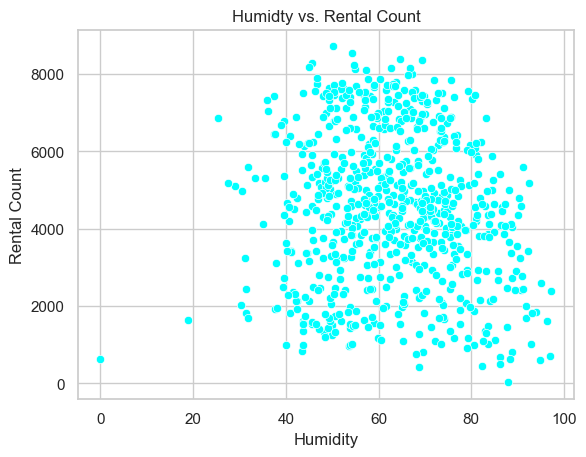

In [175]:
plot_scatter(bike_data, x='hum', y='cnt', title='Humidty vs. Rental Count', xlabel='Humidity', ylabel='Rental Count')

We don't see any relationship from above plot.

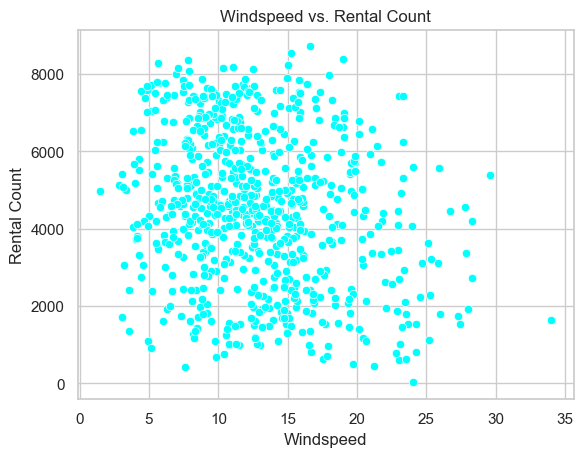

In [176]:
plot_scatter(bike_data, x='windspeed', y='cnt', title='Windspeed vs. Rental Count', xlabel='Windspeed', ylabel='Rental Count')

We don't see any relationship from above plot.

#### Correlation b/w features

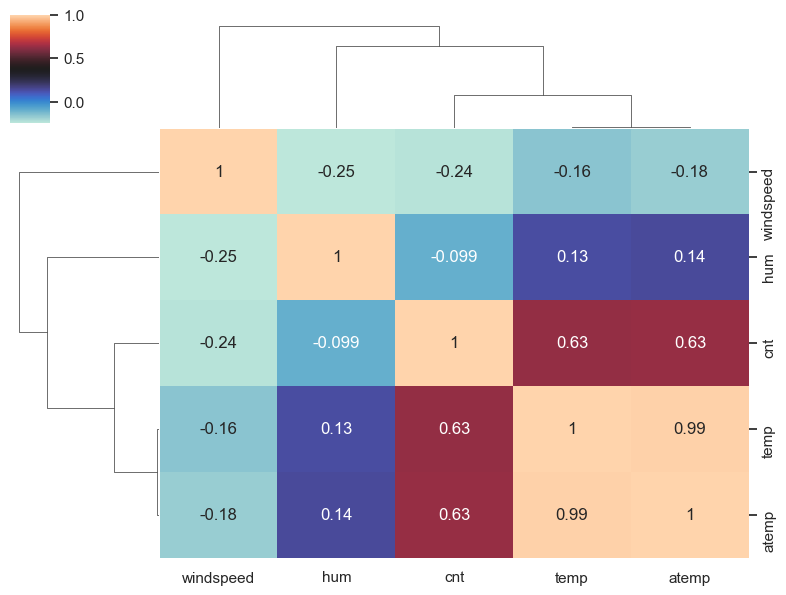

In [177]:
defaulted_entries = bike_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

sns.clustermap(defaulted_entries.corr(),annot=True,figsize=(8, 6),cmap="icefire")

plt.show()


We can see very high correltion between atemp and temp, so we can drop atemp for further analysis. Also as we noticed in above scatter plots, there is a positive relationship between temperature and Count of rental bikes.

There is a little negative relationship between windspeed and rental bike count, and very small relationship with humidity.

In [178]:
# Dropping atemp
bike_data.drop('atemp', axis=1, inplace=True)

In [179]:
pd.crosstab(bike_data['workingday'], bike_data['weekday'])

weekday,0,1,2,3,4,5,6
workingday,,,,,,,
0,105,15,1,1,2,2,105
1,0,90,103,102,102,102,0


We can see that weekends that is 0 and 6 are not working for everyone.

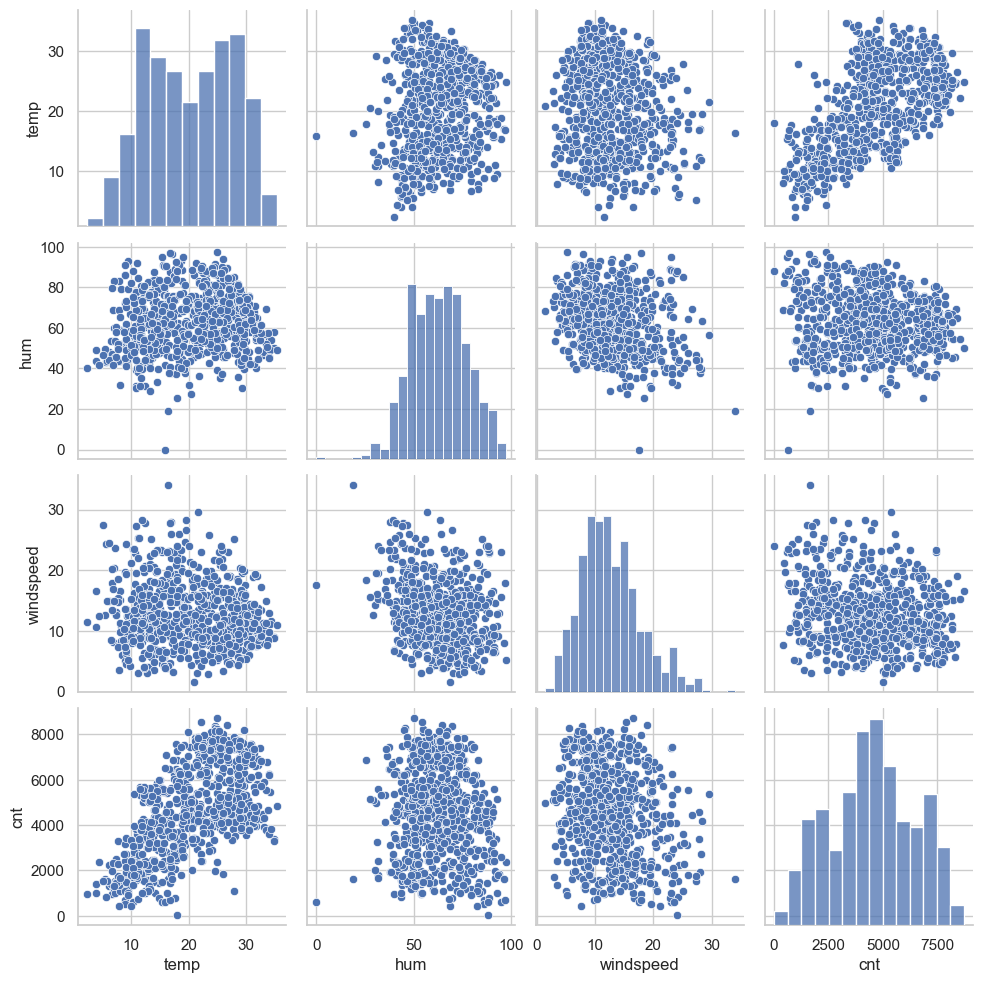

In [180]:
sns.pairplot(data=bike_data,vars=['temp','hum','windspeed','cnt'])
plt.show()

From pair plots and correlation matrix we can say that temperature has the highest correlation

In [181]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 62.9+ KB


### Data Preparation

#### Dummy variables

In [182]:
# Let's update months and Weekday for better understanding
def get_weekday(num):
    if num == 0:
        return 'Sun'
    elif num == 1:
        return 'Mon'
    elif num == 2:
        return 'Tue'
    elif num == 3:
        return 'wed'
    elif num == 4:
        return 'thur'
    elif num == 5:
        return 'fri'
    else:
        return 'sat'
    

def get_month(num):
    if num == 1:
        return 'Jan'
    elif num == 2:
        return 'Feb'
    elif num == 3:
        return 'Mar'
    elif num == 4:
        return 'Apr'
    elif num == 5:
        return 'May'
    elif num == 6:
        return 'Jun'
    elif num == 7:
        return 'Jul'
    elif num == 8:
        return 'Aug'
    elif num == 9:
        return 'Sep'
    elif num == 10:
        return 'Oct'
    elif num == 11:
        return 'Nov'
    else:
        return 'Dec'

bike_data['mnth'] = bike_data['mnth'].map(get_month)
bike_data['weekday'] = bike_data['weekday'].map(get_weekday)


Season, month, weekday and weathersit are good candidates for dummy variables. Since holiday and working day are already binary, there is no point in considering them.

In [183]:
seasons = pd.get_dummies(bike_data['season'], drop_first = True).apply(lambda x: x.map({True: 1, False: 0}))

bike_data = pd.concat([bike_data, seasons], axis=1)
bike_data.drop('season', axis=1, inplace=True)
bike_data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,sat,0,Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Sun,0,Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [184]:
months = pd.get_dummies(bike_data['mnth'], drop_first = True).apply(lambda x: x.map({True: 1, False: 0}))

bike_data = pd.concat([bike_data, months], axis=1)
bike_data.drop('mnth', axis=1, inplace=True)
bike_data.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,sat,0,Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,Sun,0,Cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,wed,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [185]:
weekdays = pd.get_dummies(bike_data['weekday'], drop_first = True).apply(lambda x: x.map({True: 1, False: 0}))

bike_data = pd.concat([bike_data, weekdays], axis=1)
bike_data.drop('weekday', axis=1, inplace=True)
bike_data.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Sun,Tue,fri,sat,thur,wed
0,0,0,0,Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,Cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [186]:
weather_situation = pd.get_dummies(bike_data['weathersit'], drop_first = True).apply(lambda x: x.map({True: 1, False: 0}))

bike_data = pd.concat([bike_data, weather_situation], axis=1)
bike_data.drop('weathersit', axis=1, inplace=True)
bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Sun,Tue,fri,sat,thur,wed,Cloudy,Light Snow
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### Testing and training data split

In [187]:
from sklearn.model_selection import train_test_split
np.random.seed(0)

bike_train_data, bike_test_data = train_test_split(bike_data, train_size=0.7, test_size=0.3, random_state=100)

In [188]:
print('Training data shape', bike_train_data.shape)
print('Test data shape', bike_test_data.shape)

Training data shape (510, 29)
Test data shape (219, 29)


#### Rescaling the features

Let's use min-max scaling

In [189]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [190]:
bike_train_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Sun', 'Tue', 'fri', 'sat', 'thur',
       'wed', 'Cloudy', 'Light Snow'],
      dtype='object')

In [191]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

bike_train_data[num_vars] = scaler.fit_transform(bike_train_data[num_vars])
bike_train_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Sun,Tue,fri,sat,thur,wed,Cloudy,Light Snow
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


#### Dividing into X and y sets for the model building

In [192]:
y_train = bike_train_data.pop('cnt')
X_train = bike_train_data

#### Model Building

Recursive feature elimination

In [193]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [194]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

rfe = RFE(linear_model, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [195]:
feature_selected = bike_train_data.columns[rfe.support_]
feature_selected

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'Jan', 'Jul', 'Sep', 'Sun', 'sat', 'Cloudy', 'Light Snow'],
      dtype='object')

In [196]:
import statsmodels.api as sm

def get_linear_model(y_train, X_train):
    X_train = sm.add_constant(X_train)
    linear_model = sm.OLS(y_train, X_train).fit()
    return linear_model

In [197]:
X_train_rfe = bike_train_data[feature_selected]

In [198]:
linear_model = get_linear_model(y_train, X_train_rfe)
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          4.03e-190
Time:                        22:03:28   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2503      0.025      9.865      0.0

In [199]:
# Let's remove holiday as it's P value is greater then 0.05
X_train_rfe.drop('holiday', axis = 1, inplace=True)

In [200]:
linear_model = get_linear_model(y_train, X_train_rfe)
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          4.03e-190
Time:                        22:03:28   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2443      0.040      6.120      0.0

From above statistics all remaining features are signification. We should check for VIF now.

In [201]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_for_features(features):
    vif = pd.DataFrame()
    X = X_train_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

get_vif_for_features(X_train_rfe)

,Features,VIF
3,hum,29.73
2,temp,18.10
1,workingday,17.04
11,sat,4.60
4,windspeed,4.55
10,Sun,4.47
5,spring,3.11
12,Cloudy,2.28
6,winter,2.18
0,yr,2.09


In [202]:
# Let's remove humidity as VIF is higher then 5
X_train_rfe.drop('hum', axis = 1, inplace=True)

In [203]:
# Let's check the stats now.
linear_model = get_linear_model(y_train, X_train_rfe)
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.3
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          3.12e-188
Time:                        22:03:28   Log-Likelihood:                 506.90
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     496   BIC:                            -926.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1686      0.035      4.817      0.0

In [204]:
# Since P values are significant, let's check VIF
get_vif_for_features(X_train_rfe)

,Features,VIF
1,workingday,13.48
2,temp,12.76
3,windspeed,4.51
10,sat,3.85
9,Sun,3.60
4,spring,2.85
0,yr,2.07
5,winter,1.79
6,Jan,1.65
11,Cloudy,1.58


In [205]:
# Let's remove workingday as VIF is higher then 5
X_train_rfe.drop('workingday', axis = 1, inplace=True)

In [206]:
# Let's check the stats now.
linear_model = get_linear_model(y_train, X_train_rfe)
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.5
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          4.99e-186
Time:                        22:03:28   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     497   BIC:                            -916.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2691      0.025     10.924      0.0

Notice that `sat` is now has insignificant p-value. Drop it.

In [207]:
# Let's remove sat as it's P value is greater then 0.05
X_train_rfe.drop('sat', axis = 1, inplace=True)

In [208]:
# Let's check the stats now.
linear_model = get_linear_model(y_train, X_train_rfe)
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     229.1
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          8.08e-187
Time:                        22:03:28   Log-Likelihood:                 497.93
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     498   BIC:                            -921.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2719      0.025     11.068      0.0

In [209]:
# Since P values are significant, let's check VIF
get_vif_for_features(X_train_rfe)

,Features,VIF
1,temp,4.69
2,windspeed,4.01
3,spring,2.25
0,yr,2.06
5,Jan,1.60
9,Cloudy,1.53
4,winter,1.40
6,Jul,1.36
7,Sep,1.20
8,Sun,1.17


We notice that for our model P-values are significant and VIF are below 5. F-statistics is also 229, which is greater than 1. We can begin residual analysis now.

R2 is 0.835, and adjusted R2 is 0.831

#### Residual analysis of the training data

Let's check if the error terms are normally distributed.

In [210]:
X_train_final = sm.add_constant(X_train_rfe)
y_train_cnt = linear_model.predict(X_train_final)

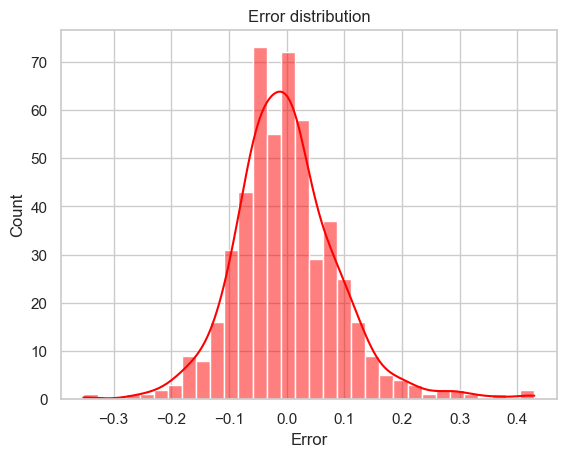

In [211]:
sns.histplot(y_train_cnt - y_train, color='red', kde=True)
plt.title('Error distribution')
plt.xlabel('Error')
plt.show()

Clearly, the error are almost normally distributed around 0.

### Making Predictions

In [212]:
# Scale test sets
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
bike_test_data[num_vars] = scaler.transform(bike_test_data[num_vars])

Splitting X_test and y_test

In [213]:
y_test = bike_test_data.pop('cnt')
X_test = bike_test_data

In [214]:
# Making the features in test consistent with the training.
X_test = X_test[X_train_rfe.columns]

# Add the constant
X_test_final = sm.add_constant(X_test)

In [215]:
y_pred = linear_model.predict(X_test_final)

In [216]:
from sklearn.metrics import r2_score


r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(round(r2,3))

0.805


#### Model evaluation

In [217]:
# Let's try to create an equation
round(linear_model.params,2).sort_values(ascending=False)

temp          0.43
const         0.27
yr            0.24
Sep           0.05
winter        0.04
Jan          -0.04
Sun          -0.04
Jul          -0.07
Cloudy       -0.08
spring       -0.10
windspeed    -0.15
Light Snow   -0.29
dtype: float64

$$
    cnt = 0.27 * const + 0.43 * temp + 0.24 * yr - 0.29 * Light Snow - 0.15 * windspeed \\
    - 0.1 * spring - 0.08 * cloudy - 0.07 * Jul + 0.05 * Sep + 0.04 * winter - 0.04 * Jan - 0.04 * Sun 
$$

In [218]:
# Calculating Adjusted-R^2 value for the test dataset
def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - n_features - 1)
    return adjusted_r2

adjusted_r2 = adjusted_r2_score(y_test, y_pred, X_test_final.shape[1])
print(round(adjusted_r2,3))

0.794


Let's now plot the graph for actual versus predicted values.

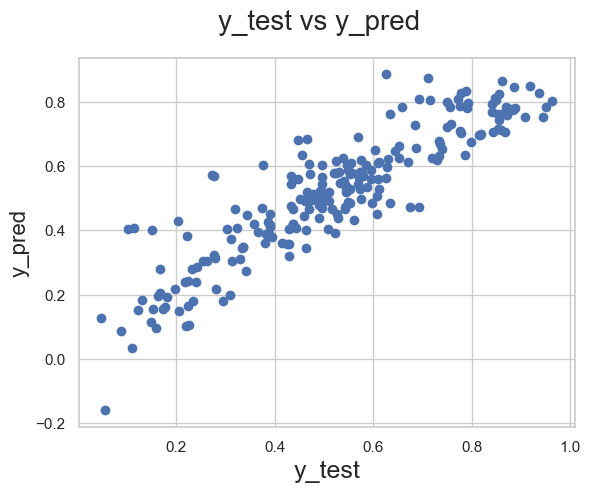

In [219]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

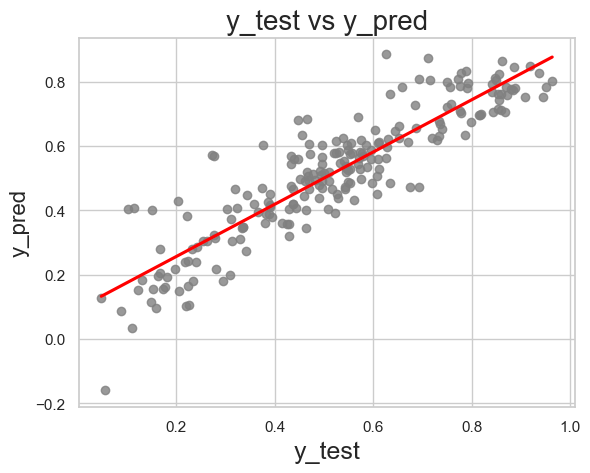

In [220]:
# Homoscedascity check
sns.regplot(x=y_test, y=y_pred, fit_reg=True, ci=0.5,scatter_kws={"color": "grey"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Summary

#### Training and Testing dataset comparision

Train data R-squared:                       0.835<br>
Test data R-squared:                        0.805<br><br>
Train data Adj. R-squared:                  0.831<br>
Test data Adj. R-squared:                   0.794<br>


*Demand of bikes depend on year, temp, light snow, windspeed, Spring, Cloudy, winter, Jul, Sept, Jan and Sun.*